In [55]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
import tools

In [69]:
def boxplot(column1, column2='ces'):
    tmp = df[[column1, column2]].dropna()
    low_q = np.percentile(tmp[column2],25)
    high_q = np.percentile(tmp[column2],75)
    low = tmp[tmp[column2]<low_q]
    high = tmp[tmp[column2]>high_q]
    plt.boxplot([low[column1].dropna(),high[column1].dropna()])
    plt.ylim(-100,1500)
    plt.title(str(column1)+' for low and high '+column2+' tumors')
    print('Pvalue of t-test on high and low: ', scipy.stats.ttest_ind(low[column1], high[column1]).pvalue)
    plt.show()

In [57]:
cancers = ['lung_adenocarcinoma','skin','head_neck_SCC','lung_scc' ]
cancer = cancers[1]

In [58]:
df1 = tools.load_aggr('data/'+cancer+'/ces.txt', column='ces')
df2 = tools.load_data('data/'+cancer+'/mmr.txt', cat='mmr')
df3 = tools.load_data('data/'+cancer+'/infl.txt', cat='infl')
df6 = tools.load_data('data/'+cancer+'/cgas.txt', cat='cgas')
df4 = tools.load_mutation('data/'+cancer+'/mutation.txt')
df5 = tools.load_aggr('data/'+cancer+'/infl.txt', column='infl')
df7 = tools.load_aggr('data/'+cancer+'/cgas.txt', column='cgas')

In [59]:
df = df4.merge(df1, how='outer', left_on='Sample ID', right_index=True)
df = df.merge(df2, how='outer', left_on='Sample ID', right_index=True)
df = df.merge(df3, how='outer', left_on='Sample ID', right_index=True)
df = df.merge(df5, how='outer', left_on='Sample ID', right_index=True)
df = df.merge(df6, how='outer', left_on='Sample ID', right_index=True)
df = df.merge(df7, how='outer', left_on='Sample ID', right_index=True)
df.head()

,Sample ID,Mutation Count,CNA,ces,MLH1_mmr,MLH3_mmr,MSH2_mmr,MSH3_mmr,MSH6_mmr,PCNA_mmr,...,PYCARD_cgas,RELA_cgas,RIPK1_cgas,RIPK3_cgas,SPTB_cgas,TBK1_cgas,TMEM173_cgas,TREX1_cgas,ZBP1_cgas,cgas
0,TCGA-3N-A9WC-06,NaN,0.350241,2968.47,826.257,170.631,806.584,539.175,1115.73,1956.44,...,382.616,1363.85,1409.21,91.9402,28.907,751.982,1158.29,547.506,144.535,42087.8
1,TCGA-3N-A9WD-06,NaN,0.252234,3720.01,567.376,373.759,592.199,290.206,999.291,2922.7,...,1119.86,2270.21,902.128,67.3759,52.4823,373.05,703.546,561.241,81.5603,24647.2
2,TCGA-BF-A1PU-01,73.0,0.682543,4544.35,1467.21,358.442,369.805,316.438,746.429,3877.27,...,1358.12,4066.23,1081.17,14.6104,256.818,133.442,705.519,515.052,0.6494,26318.8
3,TCGA-BF-A1PV-01,253.0,0.186543,4006.68,770.771,762.702,1142.86,487.46,1510.76,2852.06,...,334.728,2316.2,1395.4,11.9546,102.51,543.634,983.861,291.157,5.0807,20010.5
4,TCGA-BF-A1PX-01,309.0,0.000762,4895.79,1044.84,171.359,641.641,239.659,1376.78,3324.99,...,1327.42,2682.31,1529.37,210.288,51.0949,330.205,1336.11,563,115.05,38796.9


In [60]:
corr = pd.DataFrame([])
for c in df.columns.values:
    if 'inf' in c:
        tmp = df[['ces',c]].dropna()
        correlation, pvalue = scipy.stats.spearmanr(tmp['ces'], tmp[c])
        corr = corr.append(pd.Series([c, correlation, pvalue]), ignore_index=True)
        if correlation<0.005:
            print('Correlation with ',c ,' : ',correlation)
#             plt.figure()
#             plt.scatter(df['ces'],df[c],marker='.')
#             plt.xlabel('CES')
#             plt.ylabel(c)
#             plt.show()
        
corr.columns=['gene', 'correlation', 'pvalue']
corr.to_csv('data/'+cancer+'/correlation_with_ces.csv')
corr.head()

Correlation with  ADIPOQ_infl  :  -0.0359614513296
Correlation with  AXL_infl  :  -0.125604858174
Correlation with  CCL13_infl  :  -0.0213067729557
Correlation with  CCL25_infl  :  -0.0282025794114
Correlation with  CCL5_infl  :  -0.0855725534241
Correlation with  CXCL13_infl  :  -0.00772025187848
Correlation with  FAS_infl  :  -0.00879593481443
Correlation with  FGF7_infl  :  -0.0272632097647
Correlation with  GDNF_infl  :  -0.0282004434733
Correlation with  HGF_infl  :  -0.07066103239
Correlation with  IFNAR2_infl  :  -0.0229667510309
Correlation with  IGFBP4_infl  :  -0.125193574016
Correlation with  IGFBP7_infl  :  -0.130376393476
Correlation with  IL15_infl  :  0.00157358419005
Correlation with  MMP14_infl  :  -0.0188319986379
Correlation with  PLAT_infl  :  -0.0497513465448
Correlation with  PLAU_infl  :  -0.0850619859091
Correlation with  SERPINE1_infl  :  -0.0279417601547
Correlation with  SMAD3_infl  :  -0.188478046295
Correlation with  TIMP1_infl  :  -0.147430763553
Correlati

,gene,correlation,pvalue
0,ADIPOQ_infl,-0.035961,0.435707
1,AXL_infl,-0.125605,0.006287
2,CCL1_infl,0.052934,0.251057
3,CCL13_infl,-0.021307,0.644277
4,CCL16_infl,0.016750,0.716627


In [61]:
corr_gas = pd.DataFrame([])
for c in df.columns.values:
    if 'cgas' in c:
        tmp = df[['ces',c]].dropna()
        correlation, pvalue = scipy.stats.spearmanr(tmp['ces'], tmp[c])
        corr_gas = corr_gas.append(pd.Series([c, correlation,  pvalue]), ignore_index=True)
        if correlation<0.000005:
            print('Correlation with ',c ,' : ',correlation)
#             plt.figure()
#             plt.scatter(df['ces'],df[c],marker='.')
#             plt.xlabel('CES')
#             plt.ylabel(c)
#             plt.show()
        
corr_gas.columns=['gene', 'correlation','pvalue']
corr_gas.to_csv('data/'+cancer+'/correlation_cgas_with_ces.csv')

Correlation with  ADAR_cgas  :  -0.114955519915
Correlation with  CASP1_cgas  :  -0.072605005844
Correlation with  CCL4_cgas  :  -0.0107488498537
Correlation with  CCL5_cgas  :  -0.0855725534241
Correlation with  DDX58_cgas  :  -0.00921509317001
Correlation with  IFNA2_cgas  :  -0.00973462872395
Correlation with  IKBKE_cgas  :  -0.0467964684339
Correlation with  IKBKG_cgas  :  -0.114191722781
Correlation with  IL18_cgas  :  -0.108582099005
Correlation with  IL33_cgas  :  -0.0521430483734
Correlation with  IRF3_cgas  :  -0.053723822003
Correlation with  IRF7_cgas  :  -0.0714661002114
Correlation with  MAVS_cgas  :  -0.21681408153
Correlation with  NFKB1_cgas  :  -0.0322497448874
Correlation with  PYCARD_cgas  :  -0.0854022881733
Correlation with  RELA_cgas  :  -0.275612081894
Correlation with  RIPK3_cgas  :  -0.11586481852
Correlation with  SPTB_cgas  :  -0.0810356463769
Correlation with  TMEM173_cgas  :  -0.241775058606
Correlation with  TREX1_cgas  :  -0.0364888018644
Correlation with

In [62]:
df['infl'] = np.zeros(len(df))
selected_genes = corr[corr['pvalue']<0.005]['gene']
corr.index=corr['gene']
for g in selected_genes:
    if corr.loc[g]['correlation']<0:
        sign = -1
    else:
        sign = 1
    df['infl'] += sign*df[g]

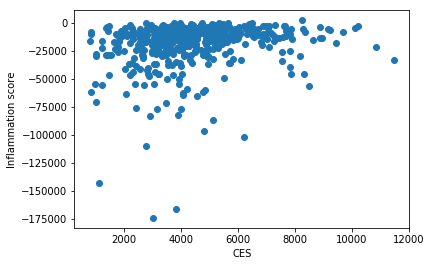

Correlation: 
SpearmanrResult(correlation=0.24159920153357414, pvalue=1.0731491259353382e-07)


In [63]:
plt.figure()
plt.scatter(df['ces'],df['infl'])
plt.xlabel('CES')
plt.ylabel('Inflammation score')
plt.show()
print('Correlation: ')
tmp = df[['ces','infl']].dropna()
print(scipy.stats.spearmanr(tmp['ces'], tmp['infl']))

Pvalue of t-test on high and low:  0.0127227944108


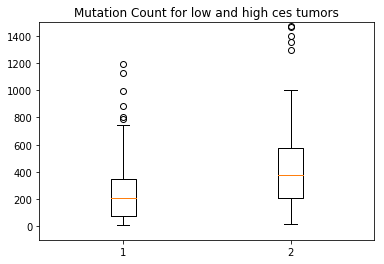

In [70]:
boxplot('Mutation Count')

Pvalue of t-test on high and low:  0.260516516026


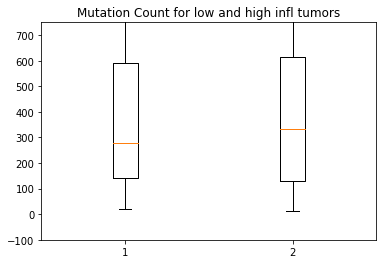

In [65]:
boxplot('Mutation Count','infl')